In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns
from google.colab import files

In [ ]:
#https://www.kaggle.com/code/ellecf/visualizing-multidimensional-clusters

In [2]:
uploaded = files.upload()
df = pd.read_excel('Errors_Multiple.xlsx')

Saving Errors_Multiple.xlsx to Errors_Multiple.xlsx


In [3]:
print(df.shape)
df.head()

(46, 4)


,company name,MAPE,MSE,Rsque
0,LB finance,0.793862,0.995128,1.28
1,JKH,0.864761,0.993304,0.53
2,Laughs gas,0.174480,0.992033,1.77
3,Lanka IOC,5.464242,0.999047,1.72
4,HNB,1.154323,0.997777,0.83


In [5]:
#exclude the categorical column and the college names
features = df.drop(['company name'],axis=1)

In [6]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [7]:
pd.DataFrame(features_normal).describe()

,0,1,2
count,46.000000,46.000000,46.000000
mean,0.030804,0.921308,0.066591
std,0.149422,0.194932,0.154595
min,0.000000,0.000000,0.000000
25%,0.000011,0.972402,0.018676
50%,0.000043,0.990425,0.030668
75%,0.001146,0.995967,0.043512
max,1.000000,1.000000,1.000000


In [8]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

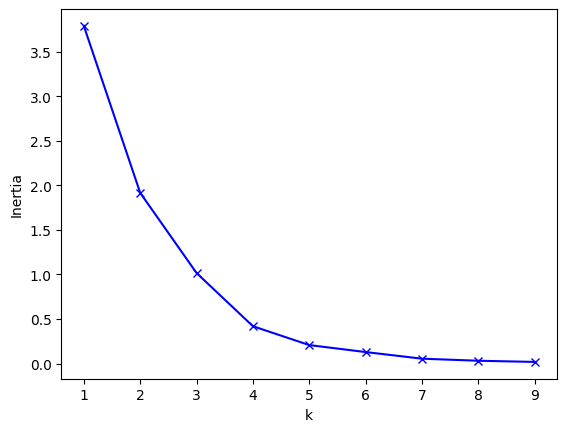

In [9]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4).fit(features_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledColleges = pd.concat((features,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [12]:
labeledColleges.head()

,MAPE,MSE,Rsque,labels
0,0.793862,0.995128,1.28,0
1,0.864761,0.993304,0.53,0
2,0.174480,0.992033,1.77,0
3,5.464242,0.999047,1.72,0
4,1.154323,0.997777,0.83,0


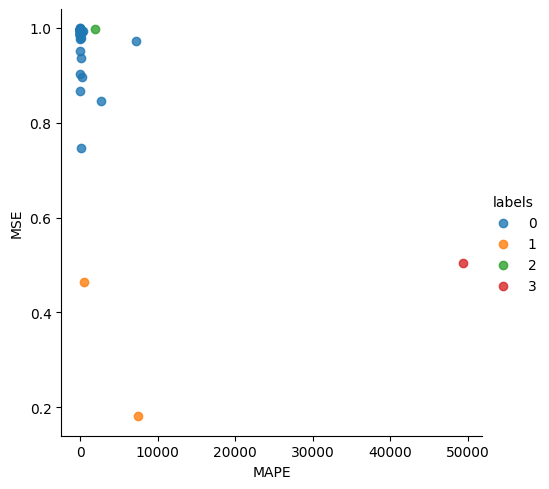

In [13]:
sns.lmplot(x='MAPE',y='MSE',data=labeledColleges,hue='labels',fit_reg=False)

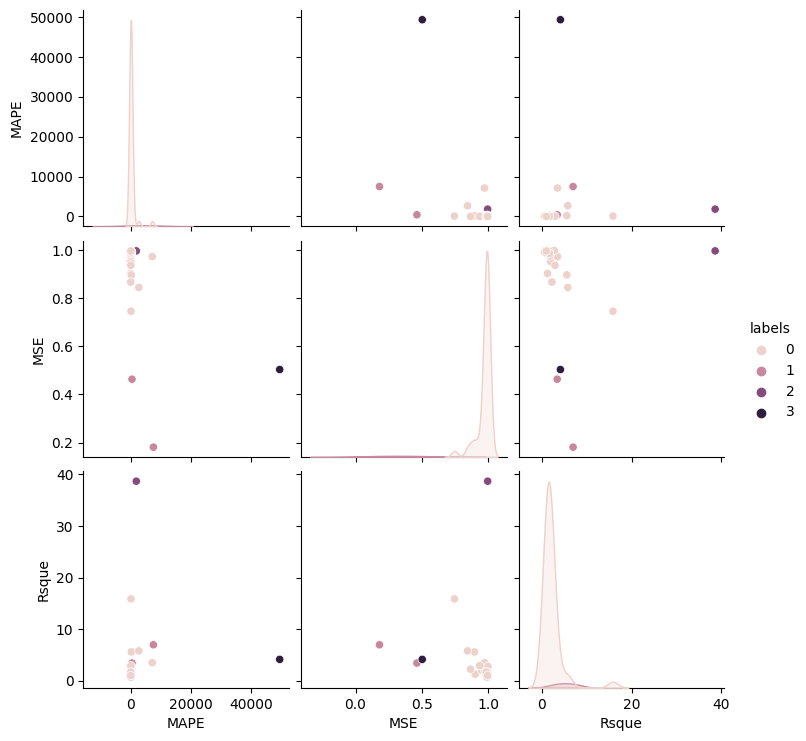

In [14]:
sns.pairplot(labeledColleges,hue='labels')

In [15]:
labeledColleges['Constant'] = "Data"

<Axes: xlabel='Constant', ylabel='MAPE'>

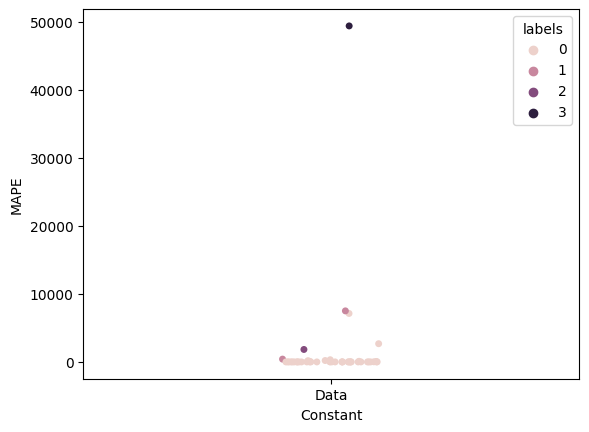

In [16]:
sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges['MAPE'],hue=labeledColleges['labels'],jitter=True)

<Axes: xlabel='Constant', ylabel='MSE'>

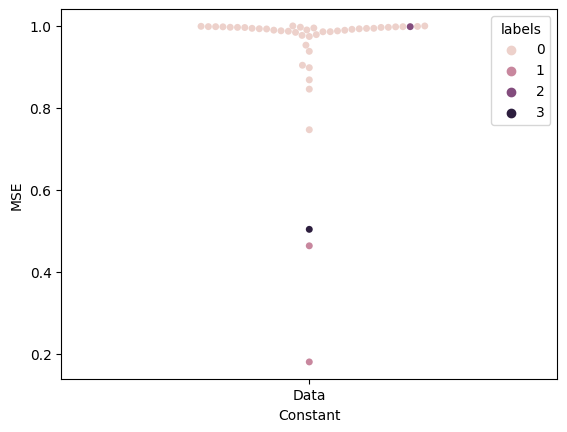

In [17]:
sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges['MSE'],hue=labeledColleges['labels'])

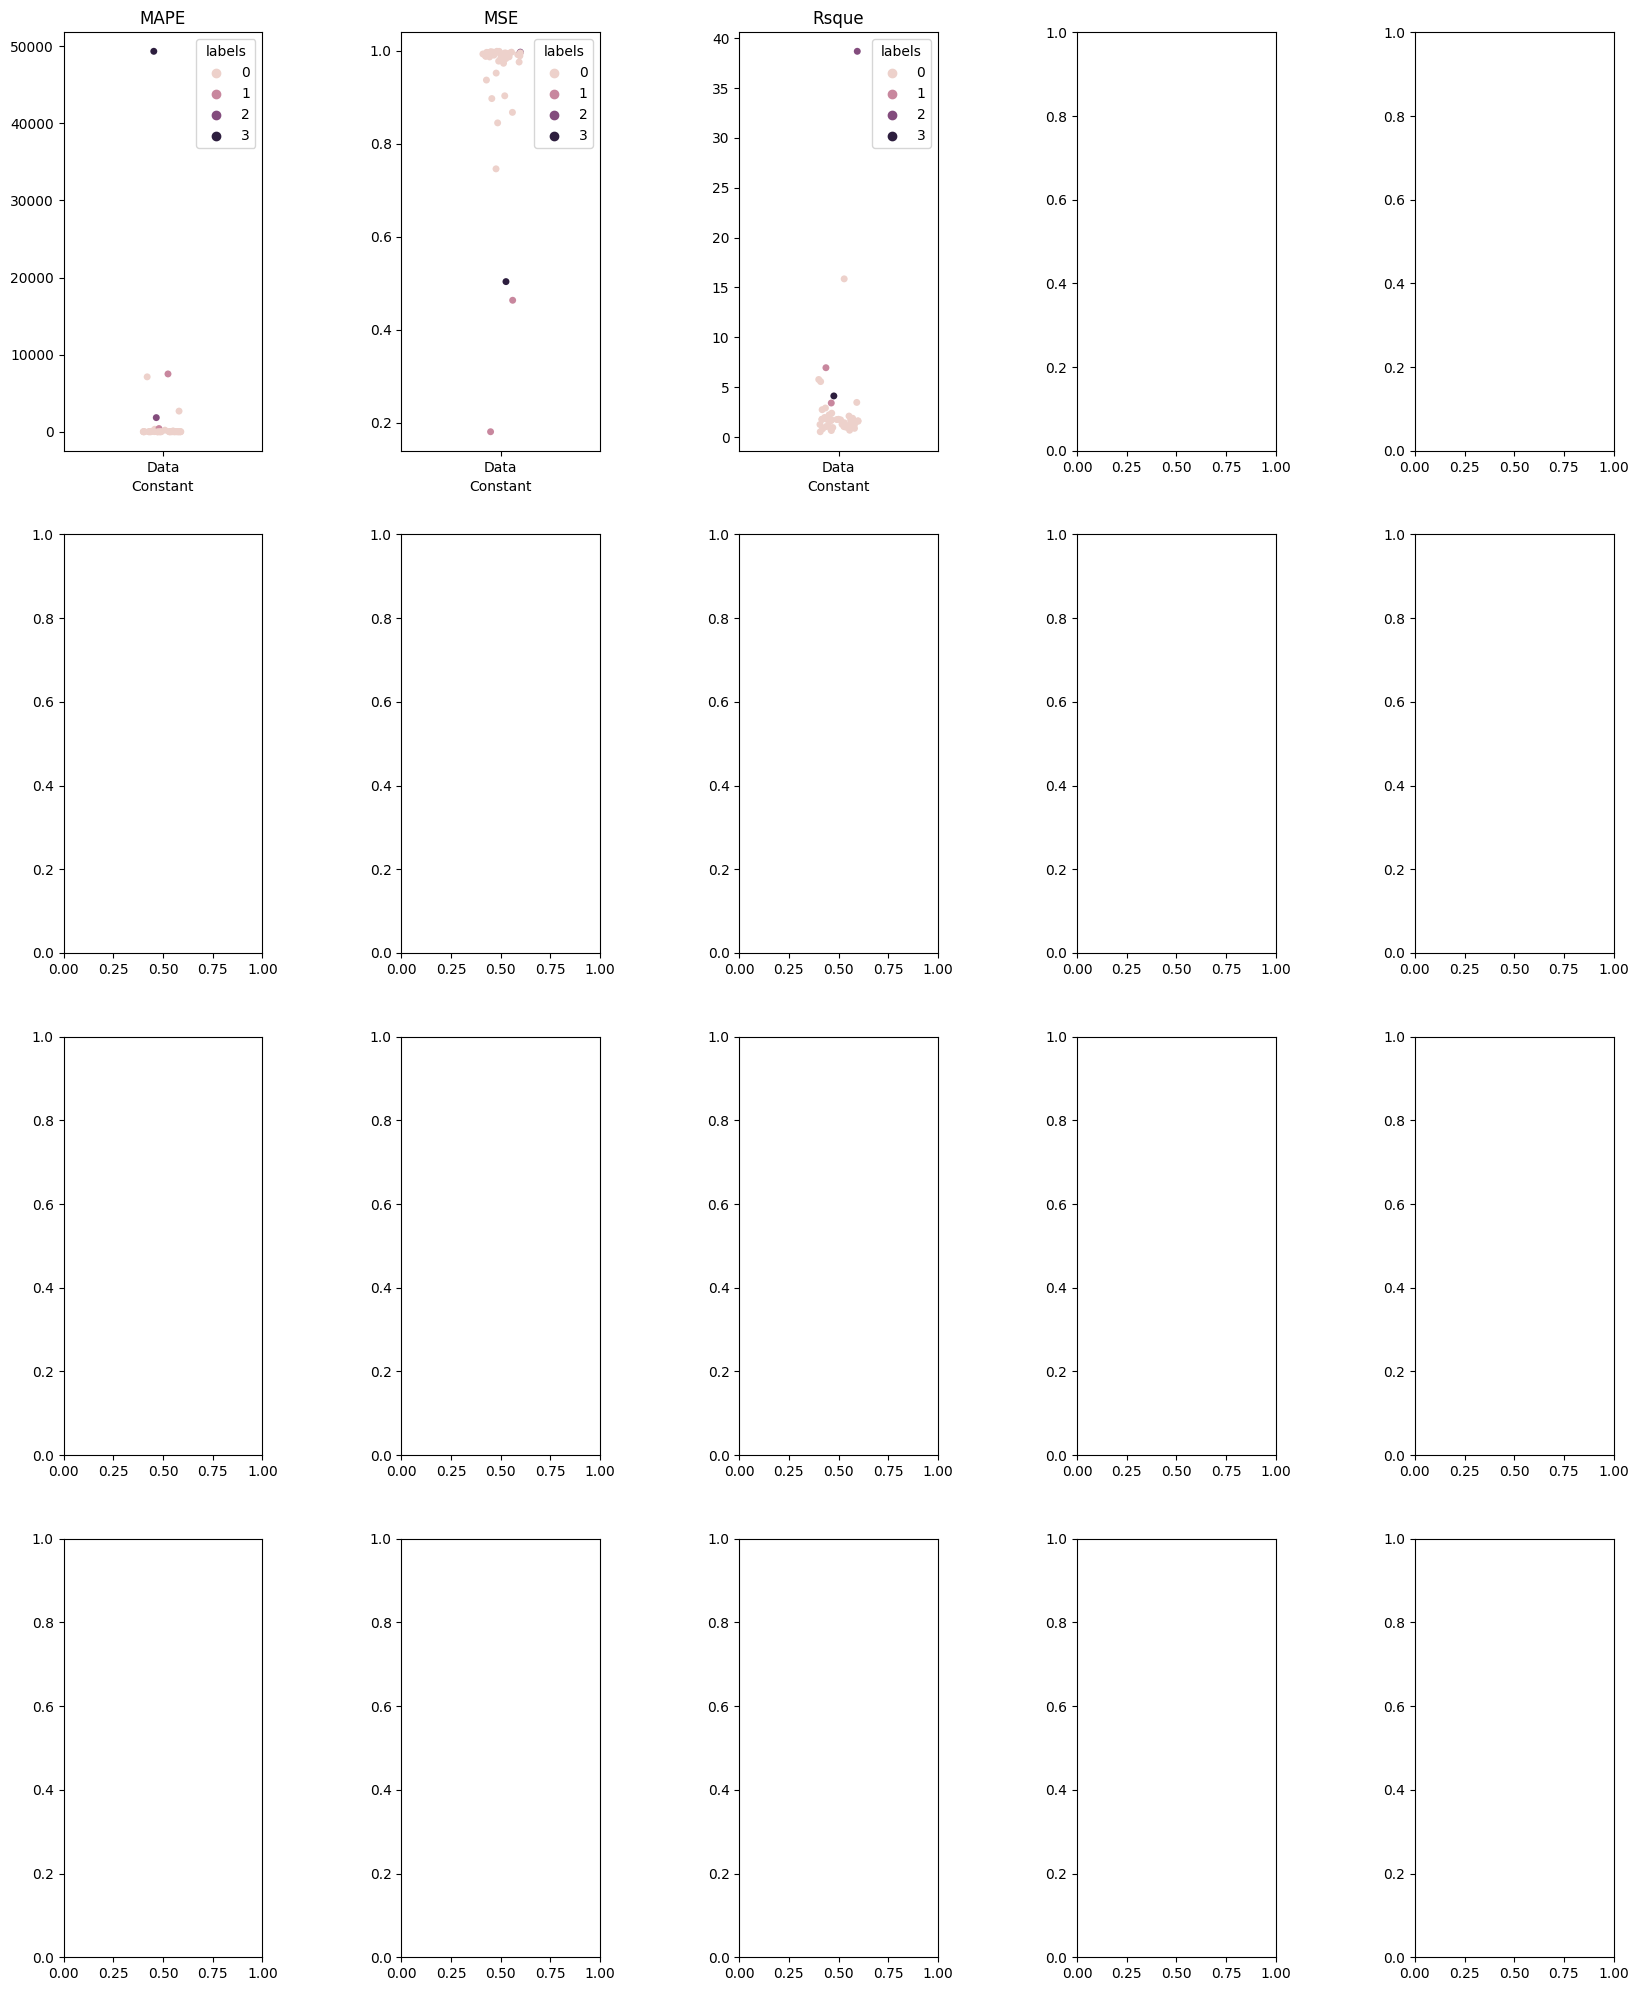

In [18]:
f, axes = plt.subplots(4, 5, figsize=(20, 25), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
f.subplots_adjust(hspace=0.2, wspace=0.7) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(labeledColleges))-2): #minus two because I don't want to plot labels or constant
    col = labeledColleges.columns[i]
    if i < 5:
        ax = sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 5 and i<10:
        ax = sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],jitter=True,ax=axes[1,(i-5)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 10 and i<15:
        ax = sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],jitter=True,ax=axes[2,(i-10)])
        ax.set_title(col)
    elif i >= 15:
        ax = sns.stripplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],jitter=True,ax=axes[3,(i-15)])
        ax.set_title(col)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


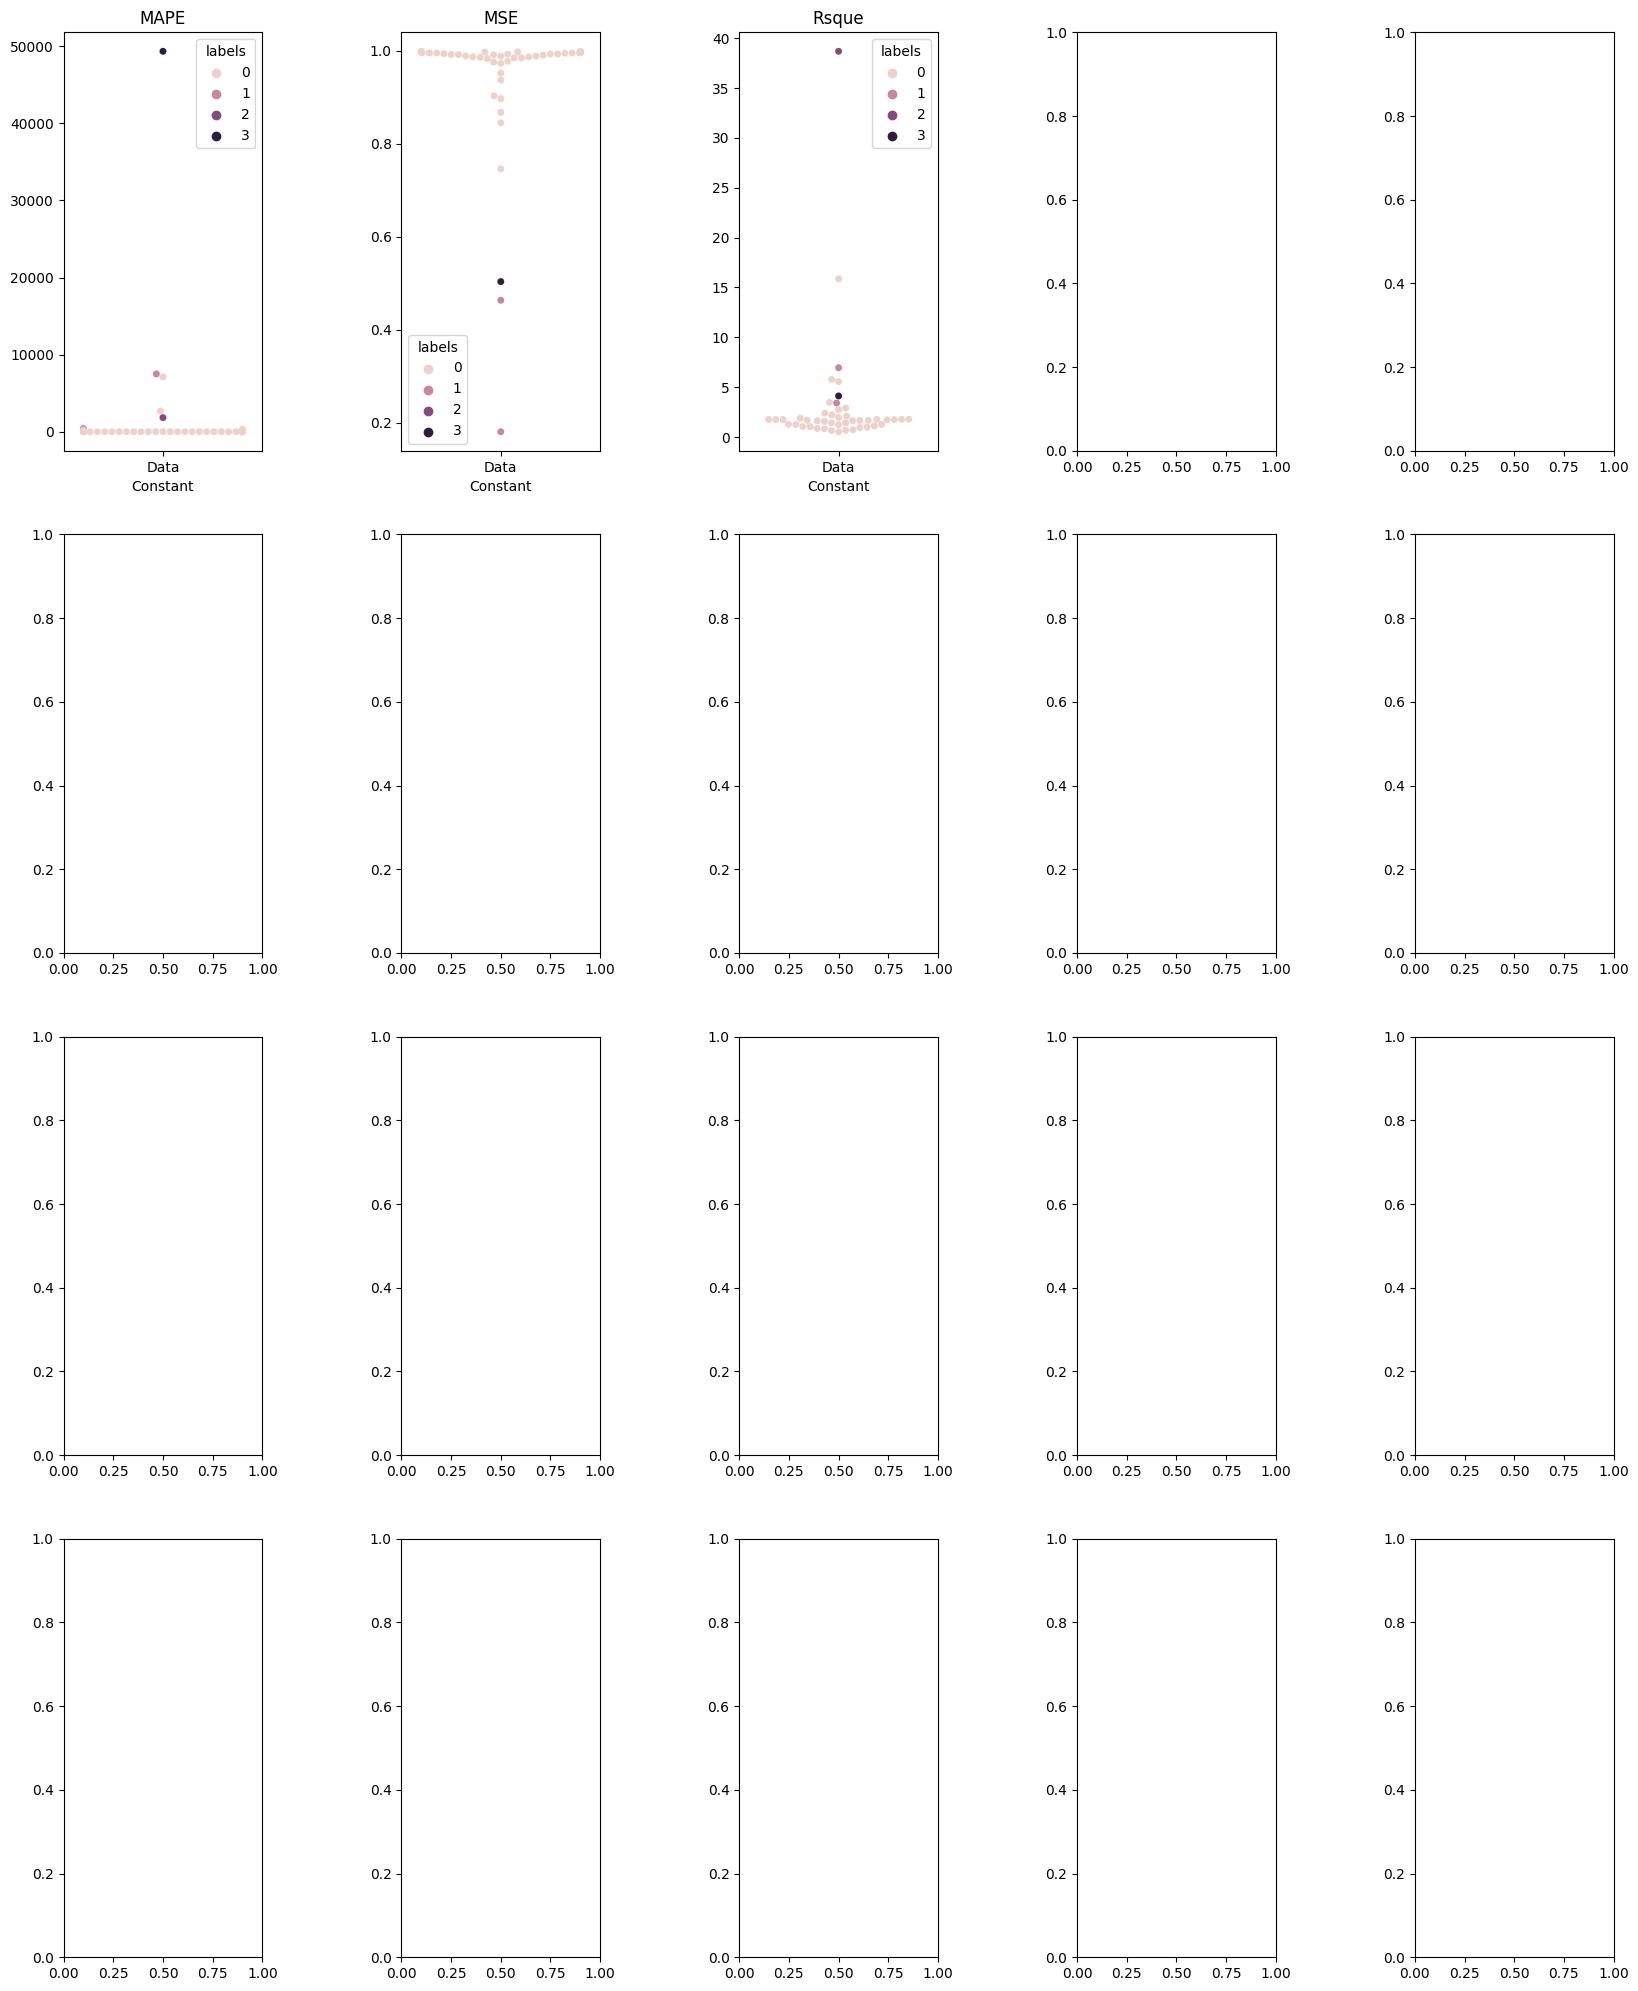

In [19]:
f, axes = plt.subplots(4, 5, figsize=(20, 25), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)
for i in range(0,len(list(labeledColleges))-2):
    col = labeledColleges.columns[i]
    if i < 5:
        ax = sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 5 and i<10:
        ax = sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],ax=axes[1,(i-5)])
        ax.set_title(col)
    elif i >= 10 and i<15:
        ax = sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],ax=axes[2,(i-10)])
        ax.set_title(col)
    elif i >= 15:
        ax = sns.swarmplot(x=labeledColleges['Constant'],y=labeledColleges[col].values,hue=labeledColleges['labels'],ax=axes[3,(i-15)])
        ax.set_title(col)

In [20]:
colleges = df['company name']
colleges = pd.concat((colleges,labels),axis=1)
colleges = colleges.rename({'company name':'College',0:'Cluster'},axis=1)
sortcolleges = colleges.sort_values(['Cluster'])
pd.set_option('display.max_rows', 1000)
sortcolleges

,College,Cluster
0,LB finance,0
23,Ceylon Tobacco,0
24,Dimo,0
25,Dialog,0
26,Asia Cap - ACAP,0
27,ACL Cables - ACL,0
28,Alufab - ALUF,0
30,ACL plas - APLA,0
31,Arpico - AINS,0
44,Nestle,0
